In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# we define the range for the phase difference, such it can take all of the following values:
n = 20
s = [i * 2 * np.pi / n for i in range(n)]
s

[0.0,
 0.3141592653589793,
 0.6283185307179586,
 0.9424777960769379,
 1.2566370614359172,
 1.5707963267948966,
 1.8849555921538759,
 2.199114857512855,
 2.5132741228718345,
 2.827433388230814,
 3.141592653589793,
 3.455751918948772,
 3.7699111843077517,
 4.084070449666731,
 4.39822971502571,
 4.71238898038469,
 5.026548245743669,
 5.340707511102648,
 5.654866776461628,
 5.969026041820607]

In [99]:
s1 = [i * np.pi / n for i in range(n)]

In [3]:
# now we construct our quantum circuit for the beam-splitter

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

q = QuantumCircuit(1,1)
q.h(0)
q.measure([0],[0])
job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
counts = job.result().get_counts()

temp1 = [] #will store how many 0 values we have for each value of phi
temp2 = [] #will store how many 1 values we have for each value of phi

for i in range(50):
    temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
    temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
dp0.append(np.std(temp1))
dp1.append(np.std(temp2))

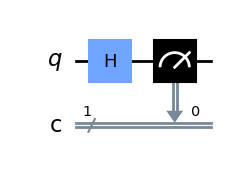

In [4]:
q.draw('mpl')

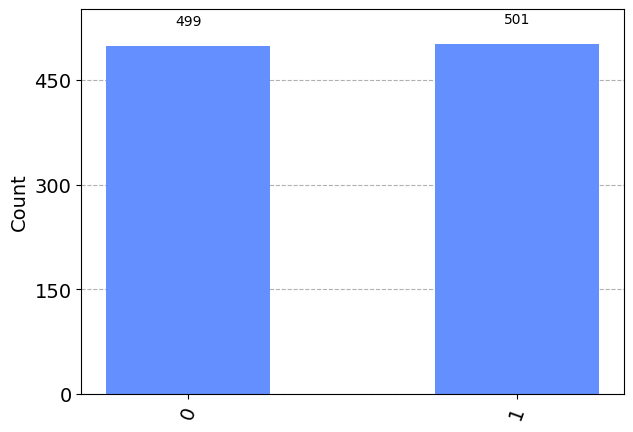

In [5]:
#we can plot an histogram for a value of phi (collected in 'counts') and for one of the 50 executions
plot_histogram(counts[2])

In [6]:
# We compute predictability as
pred1 = np.abs(p0[0]-p1[0])
pred1

0.0017599999999998173

In [7]:
# now we construct our quantum circuit for the interferometer with one degree of freedom (the path), and assing to it each value of phi:
qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

for phi in s:
    q = QuantumCircuit(1,1)
    q.h(0)
    q.p(phi,0)
    q.h(0)
    q.measure([0],[0])
    job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

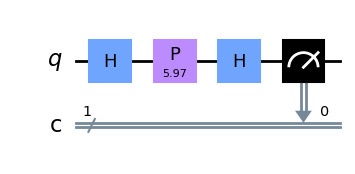

In [8]:
q.draw('mpl')

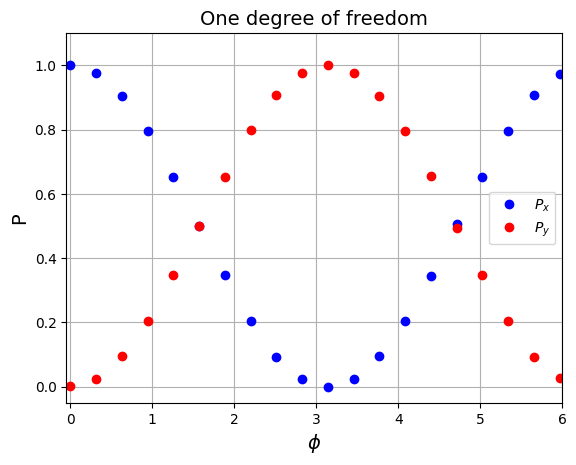

<Figure size 640x480 with 0 Axes>

In [9]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
#ax.plot(x1, f1(x1),color='green',linestyle='dashed', linewidth=3 ,label="$P_{analytical}=1/2$")
errorbar(s,p0,fmt='b.',capsize=5,label=r"$P_x$",markersize=12)
errorbar(s,p1,fmt='r.',capsize=5,label=r"$P_y$",markersize=12)
ax.set_title('One degree of freedom', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\phi$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=1000)

In [10]:
# We compute visibility as 
v1 = (max(p0) - min(p0))/(max(p0) + min(p0))
v1

1.0

Hence, for this set up (symmetric beam-splitter) visibility is 1 and predic

In [11]:
@np.vectorize
def pred1_analytic(x):
    return 0;
x = s

In [12]:
@np.vectorize
def v1_analytic(x):
    return 1;


In [13]:
v1_list=[]
for i in s:
    v1_list.append(v1)
#v1_list

In [14]:
pred1_list=[]
for i in s:
    pred1_list.append(pred1)
#pred1_list

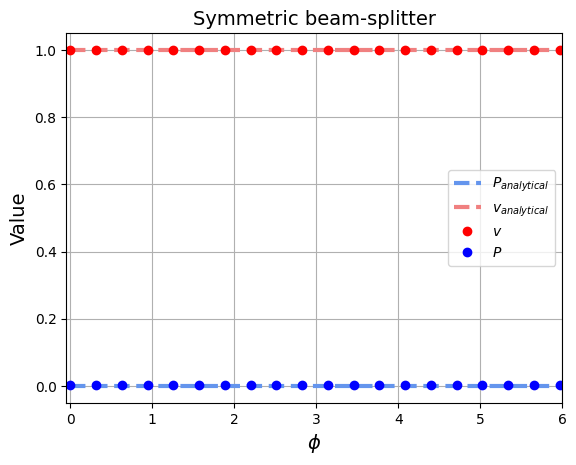

<Figure size 640x480 with 0 Axes>

In [15]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x, pred1_analytic(x),color='cornflowerblue',linestyle='dashed', linewidth=3 ,label="$P_{analytical}$")
ax.plot(x, v1_analytic(x),color='lightcoral',linestyle='dashed', linewidth=3 ,label="$v_{analytical}$")
errorbar(s,v1_list,fmt='r.',capsize=5,label=r"$v$",markersize=12)
errorbar(s,pred1_list,fmt='b.',capsize=5,label=r"$P$",markersize=12)
ax.set_title('Symmetric beam-splitter', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\phi$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.05)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig9.png', dpi=1000)

We can also analyze the situation for a general beam-splitter. First we compute the predictability:

In [16]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

for theta1 in s:
    q = QuantumCircuit(1,1)
    q.ry(theta1,0)
    q.x(0)
    q.measure([0],[0])
    job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

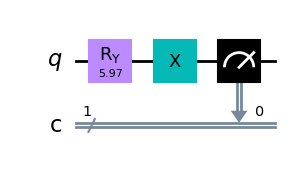

In [17]:
q.draw('mpl')

In [28]:
# We compute predictability as
pred2 = []
for i in range(n):
    pred2.append(np.abs(p0[i]-p1[i]))
#pred2

Now we contruct the whole interferometer to compute visibility

In [101]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

v2 = [] # to store visibility data for different phi values

for theta1 in s1:
    for phi in s:
        q = QuantumCircuit(1,1)
        q.ry(theta1,0)
        q.x(0)
        q.p(phi,0)
        q.ry(theta1,0)
        q.x(0)
        q.measure([0],[0])
        job = execute([q for i in range(50)],qasm_simulator,shots = 100) #implement the simulation
        counts = job.result().get_counts()
    
        temp1 = [] #will store how many 0 values we have for each value of phi
        temp2 = [] #will store how many 1 values we have for each value of phi
    
        for i in range(50):
            temp1.append(counts[i].get('0',0)/100) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
            temp2.append(counts[i].get('1',1)/100) #stores how many (relative population) 1 values we have (50 times) for each value of phi
    
        p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
        p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
        dp0.append(np.std(temp1))
        dp1.append(np.std(temp2))
    v2.append((max(p0) - min(p0))/(max(p0) + min(p0)))
    p0.clear()
    

        

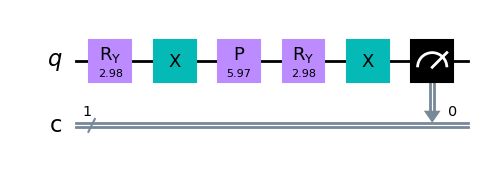

In [102]:
q.draw('mpl')

In [103]:
def fn1(x):
    return np.abs(np.sin(x));

In [104]:
def fn2(x):
    return np.abs(np.cos(x));

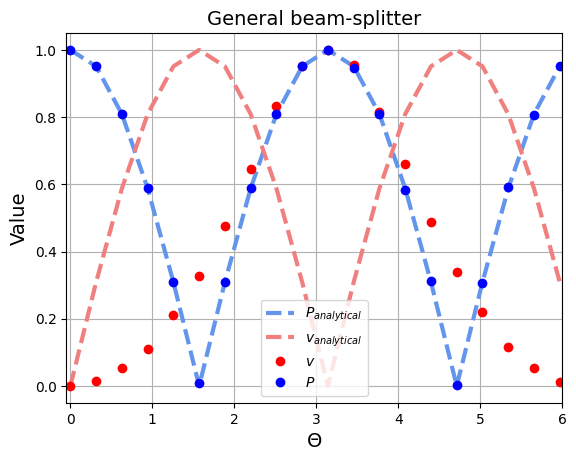

<Figure size 640x480 with 0 Axes>

In [107]:
# We can also visualize visibility and predictability
fig, ax = plt.subplots()
ax.plot(x, fn2(x),color='cornflowerblue',linestyle='dashed', linewidth=3 ,label="$P_{analytical}$")
ax.plot(x, fn1(x),color='lightcoral',linestyle='dashed', linewidth=3 ,label="$v_{analytical}$")
errorbar(s,v2,fmt='r.',capsize=5,label=r"$v$",markersize=12)
errorbar(s,pred2,fmt='b.',capsize=5,label=r"$P$",markersize=12)
ax.set_title('General beam-splitter', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.05)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig9.png', dpi=1000)

In [71]:
len(v2)

20

In [70]:
len(p0)

400